In [ ]:
import numpy as np

import matplotlib.pyplot as plt

Dataset $(x_k,y_k)$ generation

In [ ]:
np.random.seed(10)

x = np.linspace(0, 4, 100)
# 0부터 4까지의 범위에서 100개의 균등 간격 데이터를 생성

y = 3*np.sin(2*x) + np.random.normal(0, 0.2, size=x.shape)
# 3 * sin(2x) 함수 값에 평균이 0이고 표준편차가 0.2인 가우시안 노이즈를 더한 값
# 이 데이터는 회귀 문제에서 우리가 예측하려는 목표 변수

In [ ]:
print(x[:5])
print(y[:5])
# x와 y의 각 처음 5개의 값을 출력하여 데이터가 어떻게 생겼는지 확인하는 용도

[0.         0.04040404 0.08080808 0.12121212 0.16161616]
[0.2663173  0.38521629 0.17366049 0.71849328 1.07716664]


In [ ]:
beta = np.array([1,1]) 
#initialize; beta^{1}
beta_list = [beta]

Curve fit with linear function $f(x;\beta)=\beta_1*\sin(\beta_2*\pi*x)$

Define $E_2 = \frac{1}{n_{sample}}\sum_{k=1}^{10}(y_k-f(x_k;\beta))^2$

In [ ]:
def E2sq(x, y, beta):
    # 주어진 beta 파라미터를 이용해 예측된 값(y_hat)과 실제 값(y) 간의 제곱 오차의 평균을 계산하는 함수
    y_hat = beta[0] * np.sin(beta[1] * x)
    # beta[0]는 sin 함수의 계수, beta[1]는 sin 함수의 주기 결정 요소
    return np.mean((y - y_hat) ** 2)

Note that
$\partial_{i}E_2 = \frac{1}{n_{sample}} 2*\sum_{k=1}^{n_{sample}}(y_k-f(x_k;\beta))(-\partial_{i}f(x_k;\beta))$
hence,

$\partial_{1}E_2 = \frac{1}{n_{sample}}2*\sum_{k=1}^{n_{sample}}(y_k-f(x_k;\beta))(-\sin(\beta_2*x_k))$

$\partial_{2}E_2 = \frac{1}{n_{sample}}2*\sum_{k=1}^{n_{sample}}(y_k-f(x_k;\beta))(-\beta_1\cos(\beta_2*x_k)*x_k)$

In [ ]:
def grad_E2(x,y,beta):
  # E² Loss의 기울기(Gradient)를 계산
    grad_E2 = np.zeros(2)

    if False: 
      # "Mini-Batch" Gradient Descent if "True"
      idx = np.random.randint(low=0, high=len(x), size= 10)
      x_data = x[idx]
      y_data = y[idx]
    else:    
      # Classical Gradient Descent if "False"
      x_data = x
      y_data = y
    common_term = y_data-beta[0]*np.sin(beta[1]*x_data)
    
    grad_E2[0] = 2*np.mean(common_term*(-np.sin(beta[1]*x_data)))
    # beta[0]을 변화시킬 때 손실 함수의 변화율
    
    grad_E2[1] = 2*np.mean(common_term*(-beta[0]*np.cos(beta[1]*x_data)*x_data))
    # beta[1]을 변화시킬 때 손실 함수의 변화율
    
    return grad_E2

In [ ]:
def hessian_E2(x, y, beta):
    # Hessian Matrix는 E² Loss의 2차 미분
    # 기울기 벡터의 방향을 고려하여 최적화에 사용할 수 있는 2차 근사
    
    s = np.sin(beta[1] * x)
    c = np.cos(beta[1] * x)
    y_hat = beta[0] * s
    residual = y - y_hat

    # Hessian Matrix는 beta[0]과 beta[1]에 대한 2차 미분값을 포함함
    d2_beta0_beta0 = 2 * np.mean(s ** 2)
    d2_beta1_beta1 = 2 * np.mean((beta[0] * x * c) ** 2 - residual * beta[0] * x**2 * s)
    d2_beta0_beta1 = 2 * np.mean(-s * beta[0] * x * c + residual * x * c)
    # 각각 각각 beta[0]과 beta[1]의 2차 도함수
    
    H = np.array([[d2_beta0_beta0, d2_beta0_beta1],
                  [d2_beta0_beta1, d2_beta1_beta1]])
    return H

In [ ]:
# Initialization
beta = np.array([1.0, 1.0])
beta_list = []

In [ ]:
for k in range(40):  
    # Newton's method는 수십 번이면 충분
    # 40번의 반복을 통해 beta[0]와 beta[1]의 값을 점차적으로 최적화
    grad = grad_E2(x, y, beta)
    hess = hessian_E2(x, y, beta)

    try:
        delta = np.linalg.solve(hess, grad)  
        # H^{-1} * grad
        # 헤시안 행렬의 역행렬과 기울기를 곱해 delta를 구하기
    except np.linalg.LinAlgError:
        print(f"[{k}] Hessian not invertible!")
        break

    beta = beta - delta
    # 기울기(grad)와 헤시안 행렬(hess)을 계산해서 beta 값을 갱신
    
    beta_list.append(beta.copy())

    print(f"{k:2d} | β0: {beta[0]:.4f}, β1: {beta[1]:.4f}, Loss: {E2sq(x,y,beta):.6f}")

 0 | β0: -0.5713, β1: 1.1293, Loss: 4.602362
 1 | β0: -0.7981, β1: 1.3350, Loss: 5.235972
 2 | β0: -1.5396, β1: 1.8104, Loss: 9.756381
 3 | β0: 6.4034, β1: 0.9707, Loss: 25.136963
 4 | β0: -0.4976, β1: 0.9637, Loss: 4.495416
 5 | β0: -0.4968, β1: 0.9798, Loss: 4.496709
 6 | β0: -0.5102, β1: 1.0332, Loss: 4.512802
 7 | β0: -0.6054, β1: 1.1628, Loss: 4.660111
 8 | β0: -0.8793, β1: 1.3988, Loss: 5.586902
 9 | β0: -2.0979, β1: 2.0493, Loss: 13.302601
10 | β0: 2.9661, β1: 2.0158, Loss: 0.043529
11 | β0: 2.9700, β1: 1.9999, Loss: 0.037968
12 | β0: 2.9954, β1: 2.0001, Loss: 0.037651
13 | β0: 2.9945, β1: 1.9993, Loss: 0.037638
14 | β0: 2.9956, β1: 1.9994, Loss: 0.037637
15 | β0: 2.9956, β1: 1.9993, Loss: 0.037637
16 | β0: 2.9956, β1: 1.9993, Loss: 0.037637
17 | β0: 2.9956, β1: 1.9993, Loss: 0.037637
18 | β0: 2.9956, β1: 1.9993, Loss: 0.037637
19 | β0: 2.9956, β1: 1.9993, Loss: 0.037637
20 | β0: 2.9956, β1: 1.9993, Loss: 0.037637
21 | β0: 2.9956, β1: 1.9993, Loss: 0.037637
22 | β0: 2.9956, β1: 

In [ ]:
def E2Loss(x,y,beta):
  return np.sqrt(np.sum((y-beta[0]*np.sin(beta[1]*x))**2))
# E² Loss의 제곱근을 반환
# 최적화 후 손실 값이 얼마나 줄어들었는지를 확인하는 데 사용

In [ ]:
beta0_range = np.linspace(-3, 7, 100)
beta1_range = np.linspace(-3, 7, 100)
# 각각 beta[0]과 beta[1]의 값을 범위에 따라 생성한 값

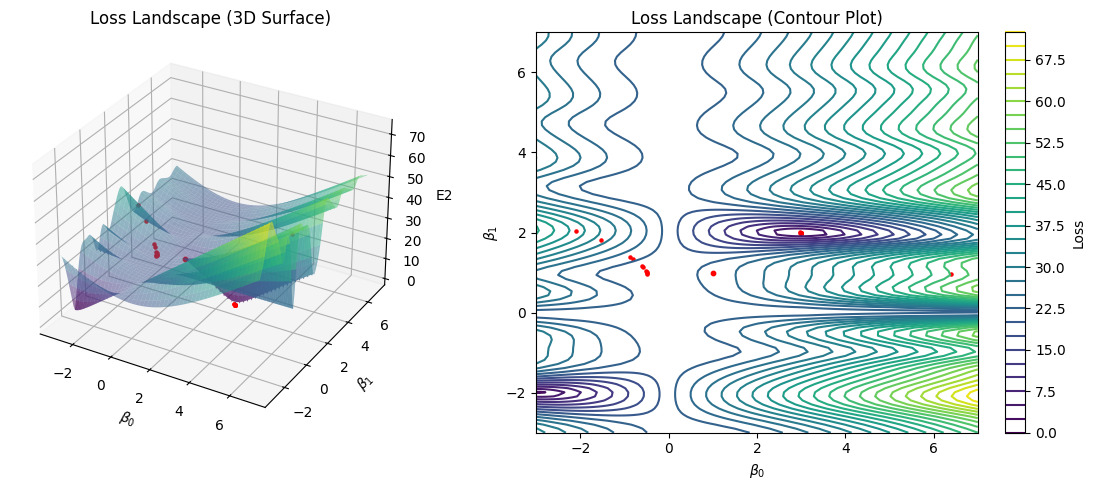

In [ ]:
loss_values = np.zeros((len(beta0_range), len(beta1_range)))
# 각 (beta0, beta1) 조합에 대해 계산된 손실 값을 저장하는 배열

for i, beta0 in enumerate(beta0_range):
    for j, beta1 in enumerate(beta1_range):
        loss_values[i, j] = E2Loss(x, y, [beta0, beta1])

B0, B1 = np.meshgrid(beta0_range, beta1_range)
# 2D 그리드 좌표를 생성

# --- 3D Surface Plot ---
# 3D Surface Plot은 beta[0]와 beta[1]의 값에 따른 손실 함수의 3D 형태를 나타냄
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(1, 1, E2Loss(x,y,[1,1]), color='red', s=10)
for k in range(len(beta_list)):
  a_fit, b_fit = beta_list[k]
  ax1.scatter(a_fit, b_fit, E2Loss(x,y,[a_fit,b_fit]), color='red', s=5)

ax1.plot_surface(B0, B1, loss_values.T, cmap='viridis', edgecolor='none', alpha=0.5)
ax1.set_xlabel(r'$\beta_0$')
ax1.set_ylabel(r'$\beta_1$')
ax1.set_zlabel('E2')
ax1.set_title('Loss Landscape (3D Surface)')

# --- Contour Plot ---
# Contour Plot은 2D 평면에서 손실 함수의 등고선을 나타냄
ax2 = fig.add_subplot(122)
contour = ax2.contour(B0, B1, loss_values.T, levels=30, cmap='viridis') 
#cf: contourf
fig.colorbar(contour, ax=ax2, label="Loss")
ax2.scatter(1, 1, color='red', s=10)
for k in range(len(beta_list)):
  a_fit, b_fit = beta_list[k]
  ax2.scatter(a_fit, b_fit, color='red', s=5)
ax2.set_xlabel(r'$\beta_0$')
ax2.set_ylabel(r'$\beta_1$')
ax2.set_title('Loss Landscape (Contour Plot)')

plt.tight_layout()
plt.show()

# 결국, 비선형 회귀 문제에서 뉴턴 방법을 사용해 최적화를 수행하고, 그 과정에서 E² Loss를 최소화하는 beta[0], beta[1] 값을 찾음
# 그 후, Loss Surface를 3D Surface Plot과 Contour Plot을 통해 시각화하여 최적화 과정을 시각적으로 확인하는 코드